In [3]:
from dotenv import load_dotenv
from prompts import system_prompt
from openai import OpenAI
import base64
import openai
import os
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
from prompts import intro_prompt, few_shot_prompt, final_prediction_prompt,system_prompt
from helpers_functions import StockWizzard
load_dotenv()

secret_key = os.getenv("openai_general_key")
secret_key_alpha = os.getenv("secret_key_alpha")

models = ["gpt-4o-mini","gpt-4o-2024-05-13"]
ticker = "ON"
indicators = ""
timeframe = "weekly"
model = models[0]

train_window = 7
target_window = 1

few_shot_train_set=10


stock_predictor = StockWizzard(ticker=ticker,
indicators=indicators,
timeframe=timeframe,
model=model,
train_window=train_window,
target_window=target_window,
secret_key=secret_key,
secret_key_alpha=secret_key_alpha,
few_shot_train_set=few_shot_train_set,
client = OpenAI(api_key=secret_key))

main_path = os.getcwd()

print(f"selected model {model}")

selected model gpt-4o-mini


In [4]:
## Prepare environment
stock_predictor.clean_folders(os.path.join(main_path,"chart_images"))

All files removed from 'c:\Users\z0040jeb\OneDrive\OneDrive - Siemens AG\DataScience\Repos\llm-predictions\chart_images\train'
All files removed from 'c:\Users\z0040jeb\OneDrive\OneDrive - Siemens AG\DataScience\Repos\llm-predictions\chart_images\test'
All files removed from 'c:\Users\z0040jeb\OneDrive\OneDrive - Siemens AG\DataScience\Repos\llm-predictions\chart_images\final_chart'


Pull data and Build windowed dataset

In [5]:
## Pull data
stock_data = stock_predictor.get_weekly_stock_data(ticker, secret_key_alpha)
## Get windowed dataset
windowed_dataset = stock_predictor.create_windows_with_labels(stock_data)


In [6]:
adjusted_dataset = stock_data.iloc[1:]
stock_data.head(2)

,Date,Open,High,Low,Close,Volume
0,2024-10-07,70.62,71.64,69.0,70.33,20623603.0
1,2024-09-30,72.31,73.54,69.5,71.54,25552705.0


In [9]:
messages = stock_predictor.test_pipeline(stock_data)
messages


TypeError: StockWizzard.test_pipeline() missing 1 required positional argument: 'target_final_date'

In [7]:
# train_weeks = 15
# start_train_window_date = stock_predictor.subtract_weeks_from_date(start_test_window_date,train_window+test_weeks)[0]
# start_train_window_date #2024-03-25

In [8]:
# stock_predictor.add_weeks_to_date("2024-02-26",train_window-1)[0]


In [9]:


# final_chart_dict = stock_predictor.build_final_predictive_window_dict(stock_data)
# stock_data

In [10]:

# target_final_date = '2024-09-23' 
# stock_data_adjusted = stock_data[stock_data['Date']<=target_final_date].copy()
# stock_data_adjusted = stock_data_adjusted.iloc[target_window:]
# stock_data_adjusted

In [11]:
# adjusted_dataset = stock_data.iloc[2:]
# adjusted_dataset

Plot and save charts as images

In [65]:


# Assuming 'result_df' is your DataFrame with windows and labels

from_date = start_train_window_date  # Specify your starting date
images_set = 10#train_weeks        # Specify the number of windows to process
save_charts = True        # Set to True to save charts as images
output_folder = 'chart_images'  # Folder where images will be saved
train = True

process_windows(result, from_date, images_set, save_charts=save_charts, output_folder=output_folder,train=train)


Saved chart and label for window 22 to chart_images\train
Window for window 22:
           Date   Open   High     Low  Close      Volume
1242 2024-02-26  76.87  82.33  75.560  81.14  27167521.0
1243 2024-03-04  81.76  85.16  75.720  78.95  38504091.0
1244 2024-03-11  78.66  82.65  74.440  74.87  34254724.0
1245 2024-03-18  75.49  77.41  72.850  74.68  25692499.0
1246 2024-03-25  72.20  76.08  72.120  73.55  25471723.0
1247 2024-04-01  73.89  74.89  68.112  69.32  31485440.0
1248 2024-04-08  69.31  71.98  66.565  66.64  27762705.0

Labels for window 22:
           Date   Open   High    Low  Close      Volume
1249 2024-04-15  67.85  67.95  60.26  60.71  37415010.0
1250 2024-04-22  61.02  68.96  59.34  68.06  49333509.0

Saved chart and label for window 23 to chart_images\train
Window for window 23:
           Date   Open   High     Low  Close      Volume
1241 2024-02-19  77.42  79.59  76.120  76.19  24888508.0
1242 2024-02-26  76.87  82.33  75.560  81.14  27167521.0
1243 2024-03-04  81.7

In [14]:



from_date = start_test_window_date  # Specify your starting date
images_set = test_weeks        # Specify the number of windows to process
save_charts = True        # Set to True to save charts as images
output_folder = 'chart_images'  # Folder where images will be saved
train = False

process_windows(result, from_date, images_set, save_charts=save_charts, output_folder=output_folder,train=train)

Saved chart and label for window 23 to chart_images\train
Window for window 23:
           Date   Open   High     Low  Close      Volume
1242 2024-02-26  76.87  82.33  75.560  81.14  27167521.0
1243 2024-03-04  81.76  85.16  75.720  78.95  38504091.0
1244 2024-03-11  78.66  82.65  74.440  74.87  34254724.0
1245 2024-03-18  75.49  77.41  72.850  74.68  25692499.0
1246 2024-03-25  72.20  76.08  72.120  73.55  25471723.0
1247 2024-04-01  73.89  74.89  68.112  69.32  31485440.0
1248 2024-04-08  69.31  71.98  66.565  66.64  27762705.0

Labels for window 23:
           Date   Open   High    Low  Close      Volume
1249 2024-04-15  67.85  67.95  60.26  60.71  37415010.0

Saved chart and label for window 24 to chart_images\train
Window for window 24:
           Date   Open   High     Low  Close      Volume
1241 2024-02-19  77.42  79.59  76.120  76.19  24888508.0
1242 2024-02-26  76.87  82.33  75.560  81.14  27167521.0
1243 2024-03-04  81.76  85.16  75.720  78.95  38504091.0
1244 2024-03-11  78.

Get image of final chart

In [31]:
stock_data.head(train_window)

,Date,Open,High,Low,Close,Volume
0,2024-09-23,69.98,75.88,69.100,74.39,24102190.0
1,2024-09-16,70.80,74.99,68.390,69.57,31367802.0
2,2024-09-09,68.80,72.17,66.360,71.72,27903810.0
3,2024-09-02,76.41,76.41,67.410,67.92,30198087.0
4,2024-08-26,76.22,78.61,73.090,77.87,23395691.0
5,2024-08-19,75.64,77.94,73.105,76.36,28322046.0
6,2024-08-12,71.32,76.62,69.610,75.84,28435775.0


In [29]:
from helpers_functions import save_candlestick_chart, plot_candlestick, load_image_and_convert_to_base64


def build_final_predictive_window_dict(stock_data, train_window):

    save_candlestick_chart(stock_data.head(train_window), "chart_images/final_chart", save_chart=True, filename='final_chart.png')
    final_image_path = os.path.join(f"{main_path}/chart_images/final_chart",'final_chart.png')
    final_chart_dict = load_image_and_convert_to_base64(final_image_path)

    return final_chart_dict

final_chart_dict = build_final_predictive_window_dict(stock_data, train_window)
final_chart_dict

Chart saved to chart_images/final_chart\final_chart.png


{'final_chart': 'iVBORw0KGgoAAAANSUhEUgAAAyAAAAI/CAYAAACPh72SAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAACUQUlEQVR4nOzdeVhU5fsG8HvYN0EQZFEQhVAQwyW3NE1zya2yNLUNs8zKJbXyW5lpmZlpma2WC6aWZaWmlZW7lZqoaSIkQigIgiGbgCwy7+8Pf0yOooAM8wyc+3NdXsKZM4fnzD3vYR7OplNKKRAREREREZmBlXQBRERERESkHWxAiIgEzJo1CzqdzvDvcrfffrth+u233y5TYBWYqs6TJ08avRYrVqwwWY3VtXPnTqNadu7cKVYLEVF9xQaEiOqsrKwsLFiwAP3794efnx8cHBzg6OiIFi1a4IEHHsC6detw4cIF6TLrpMs/hM+aNUu6nBrZtWsXHn/8cbRu3Rru7u6wtbWFh4cHunbtitmzZ+P48ePSJVaKjRER1Sc20gUQEd2Izz77DBMnTsT58+eveiwpKQlJSUlYs2YNoqKiMHr0aPMXqAFPPfUUBg8eDADw9/cXruZq6enpiIyMxC+//HLVY9nZ2di3bx/27duHZcuW4eTJk+YvkIhIo9iAEFGd8/7772PSpElG03r16oVu3brB0dERp0+fxvbt2+vEX7brshEjRkiXcE2ZmZno2bMn4uPjDdMaN26Me+65B82aNcOFCxdw5MgRbNmyRbDKyuXl5cHV1VW6DCIik+IhWERUp8THx2Pq1KmG7x0dHbF582Zs374ds2fPxksvvYSPPvoIf//9N3755Re0aNHCMO/OnTvx+OOP45ZbboGfnx8cHR3h4OCAgIAA3HvvvRX+pbyiQ1/Wrl2Lrl27wtnZGW5ubhgyZAj+/vvvCuv9+eefcdttt8HZ2Rnu7u6466678Ndff9X

Chart saved to chart_images/final_chart\final_chart.png


{'final_chart': 'iVBORw0KGgoAAAANSUhEUgAAAyAAAAI/CAYAAACPh72SAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAACYHUlEQVR4nOzdeVhUZf8G8HtYhmUQBEEWAVGIBDFcckvTNJXcKrf2wsyyckntzbfNtMzKtGx5K80FtzTbNLWs3FvUJE0SIRFCQREUAUf2ZZ7fH/6YGEFBmZnnDOf+XBeXMHPmzPfMPc9xvnM2jRBCgIiIiIiIyArsZBdARERERETqwQaEiEiC2bNnQ6PRGH9quu2224y333bbbXIKbABz1XnixAmT12LFihVmq/Fa7d6926SW3bt3S6uFiKipYgNCRDYrLy8PCxYsQExMDAICAuDs7AwXFxe0bdsWDzzwAL755huUlJTILtMm1fwQPnv2bNnlNMqePXswfvx4tG/fHp6ennB0dISXlxd69uyJOXPm4NixY7JLrBcbIyJqShxkF0BEdD1WrlyJyZMn4+LFi7XuS09PR3p6OtatW4e4uDiMHTvW+gWqwFNPPYVhw4YBAIKCgiRXU1t2djZiY2Px008/1bovPz8f+/fvx/79+7Fs2TKcOHHC+gUSEakUGxAisjkffvghpkyZYnJbv3790KtXL7i4uODUqVPYuXOnTXyzbcvuvfde2SVcUW5uLvr27YuUlBTjbS1btsTdd9+N1q1bo6SkBAkJCdi2bZvEKuun1+vh7u4uuwwiIrPiLlhEZFNSUlIwffp0498uLi7YunUrdu7ciTlz5uDFF1/Exx9/jL///hs//fQT2rZta5x29+7dGD9+PG6++WYEBATAxcUFzs7OCA4OxsiRI+v8pryuXV+++OIL9OzZEzqdDh4eHhg+fDj+/vvvOuv98ccfceutt0Kn08HT0xN33nkn/vrrr0a

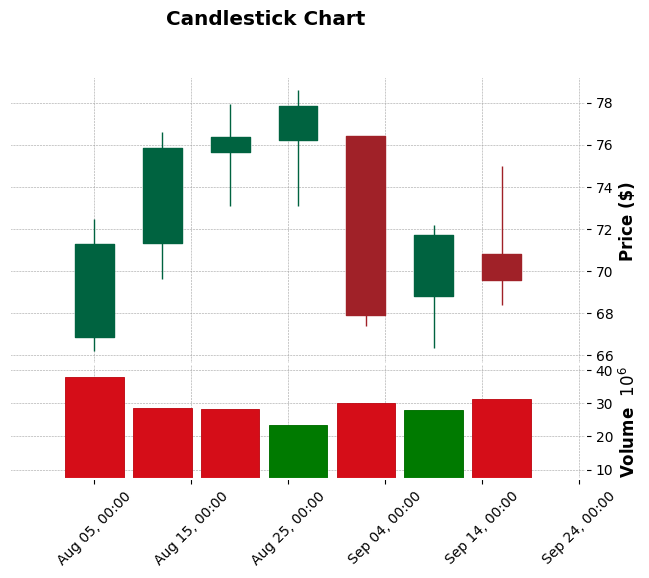

In [32]:


save_candlestick_chart(stock_data.head(train_window), "chart_images/final_chart", save_chart=True, filename='final_chart.png')

figure = plot_candlestick(stock_data.head(train_window))

final_image_path = os.path.join(f"{main_path}/chart_images/final_chart",'final_chart.png')

final_chart_dict = load_image_and_convert_to_base64(final_image_path)

final_chart_dict

Build mapping dictionaries

In [33]:
folder = "chart_images/train"  # Replace with your target folder
images_data_dict, mapping_dict = build_image_and_label_mappings(folder)

In [34]:
print(mapping_dict)
print(images_data_dict)

{'chart_23': [67.95, 60.26], 'chart_24': [71.98, 66.565], 'chart_25': [74.89, 68.112], 'chart_26': [76.08, 72.12], 'chart_27': [77.41, 72.85], 'chart_28': [82.65, 74.44], 'chart_29': [85.16, 75.72], 'chart_30': [82.33, 75.56], 'chart_31': [79.59, 76.12], 'chart_32': [83.43, 77.155], 'chart_33': [81.59, 74.8977], 'chart_34': [73.6, 68.78], 'chart_35': [77.47, 71.46], 'chart_36': [74.8317, 70.7], 'chart_37': [78.72, 72.944]}
{'chart_23': 'iVBORw0KGgoAAAANSUhEUgAAAyAAAAI/CAYAAACPh72SAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAACLXUlEQVR4nO3deVhUdf8+8HtABpBN9kVBEEJZDNNwSdPcNTVzafGxxK3MtB61NHPDcsmlx8w07ZuKmZltWqaPWVBarhEqiqAIgqAIioAjIOuc3x/+mMcRZBlgPnOY+3VdXDozZ868z9zzmZn3nE0hSZIEIiIiIiIiPTARXQARERERERkPNiBERAIsXrwYCoVC83e/p556SnP9U089JabAWmioOlNTU7Wei23btjVYjXV16NAhrVoOHTokrBYioqaKDQgRyVZOTg4+/PBDDBw4EB4eHrCwsIClpSXatGmDf/3rX9i9ezfu3r0rukxZuv9L+OLFi0WXUy+HDx/G5MmTERQUBHt7e5iZmcHBwQHdunXDkiVLcPHiRdEl1oiNERE1Jc1EF0B

Setup environment

In [35]:
client = OpenAI(api_key=secret_key)

Get prediction


In [36]:
from prompts import intro_prompt, few_shot_prompt, final_prediction_prompt,system_prompt

models = ["gpt-4o-mini","gpt-4o-2024-05-13"]

MODEL = models[1]
TICKER = ticker
INDICATORS = ""
TIMEFRAME = "weekly"

general_dict = {"TICKER":TICKER,"INDICATORS":INDICATORS,"TIMEFRAME":TIMEFRAME}


[{'role': 'system', 'content': 'You are the best AI advisor on a planet.'},
 {'role': 'user',
  'content': "\nYou are an advanced stock prediction model. In this task, you will be provided with specific stock data, including the following details:\n\n1. Ticker: ON (This will be the identifier for the stock, e.g., AAPL, TSLA, etc.).\n2. Indicators:  (You will be provided with various technical indicators, such as moving averages, RSI, MACD, etc., that you should use to inform your prediction).\n3. Timeframe: weekly (The chart data will be provided for a specific time period, e.g., daily, weekly, or monthly charts).\n4. Chart Image: In the next step, you will be shown example charts along with labeled high and low points. You must observe these examples carefully to understand how to analyze stock charts and predict future price movements.\n\nIn the final step, you will be given a current chart. Based on the patterns and insights you've gained from the examples, you will be asked to pred
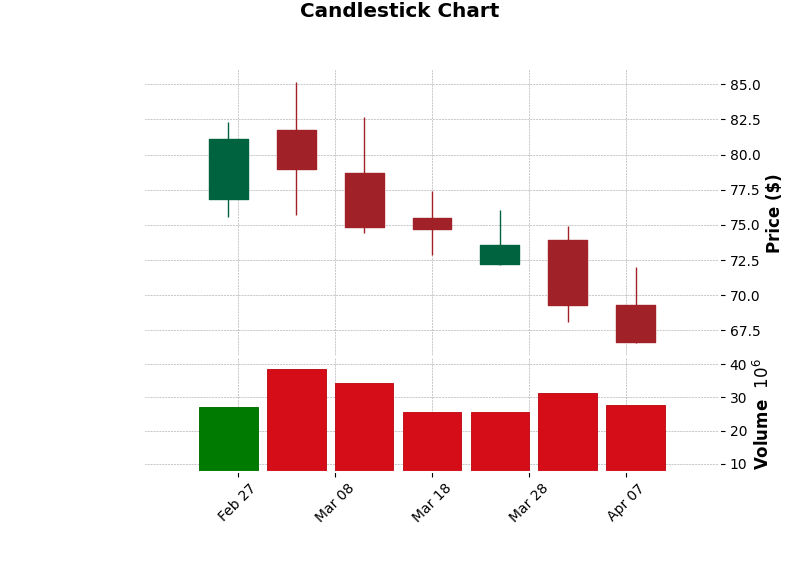
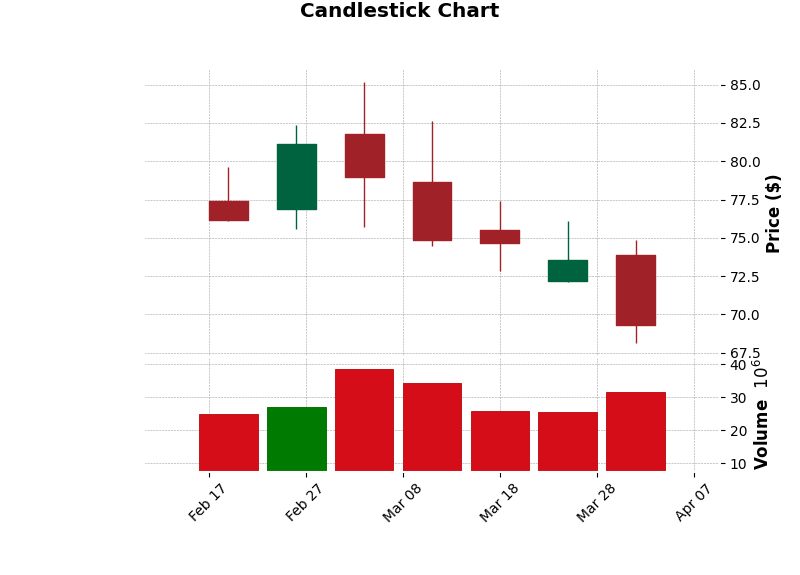
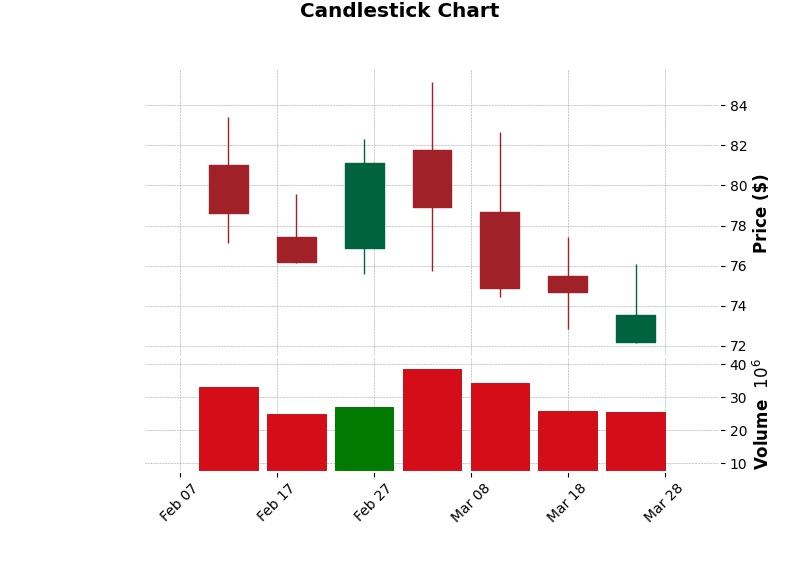
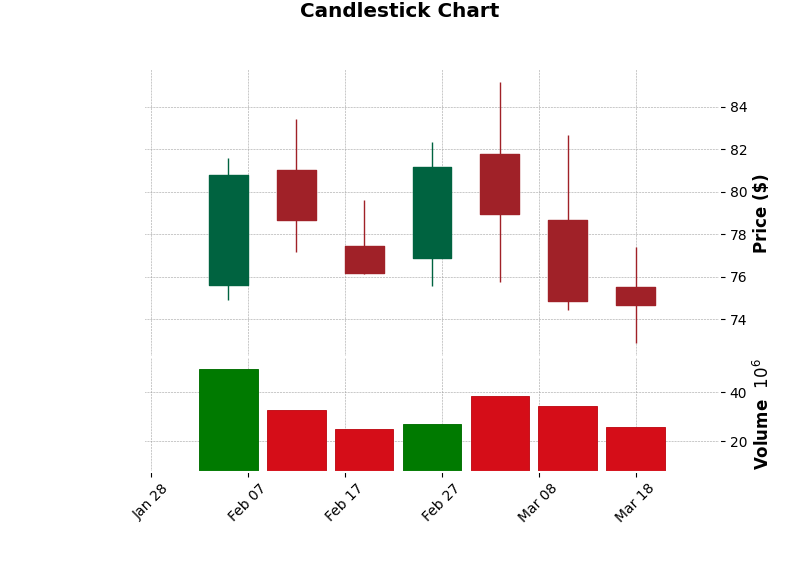
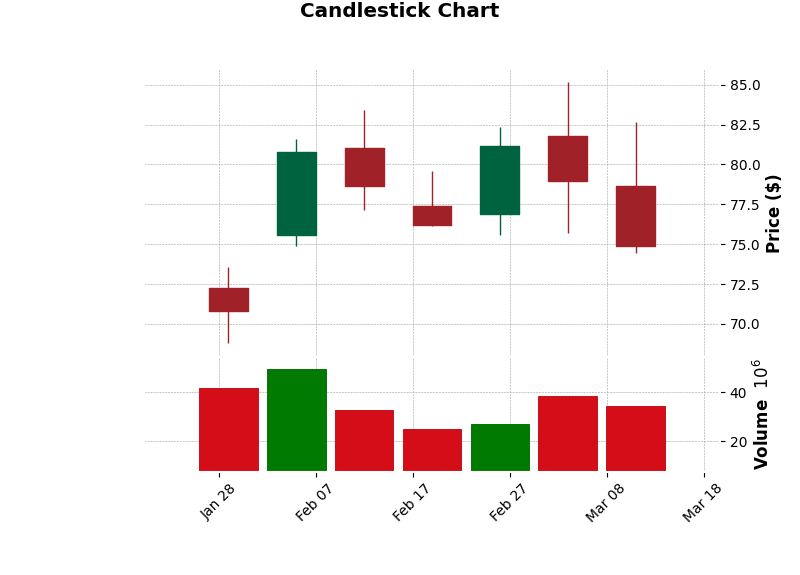
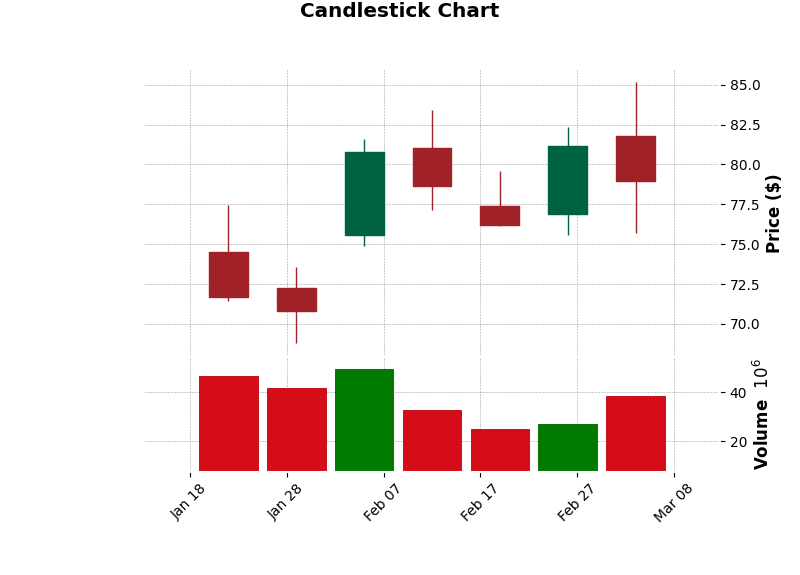
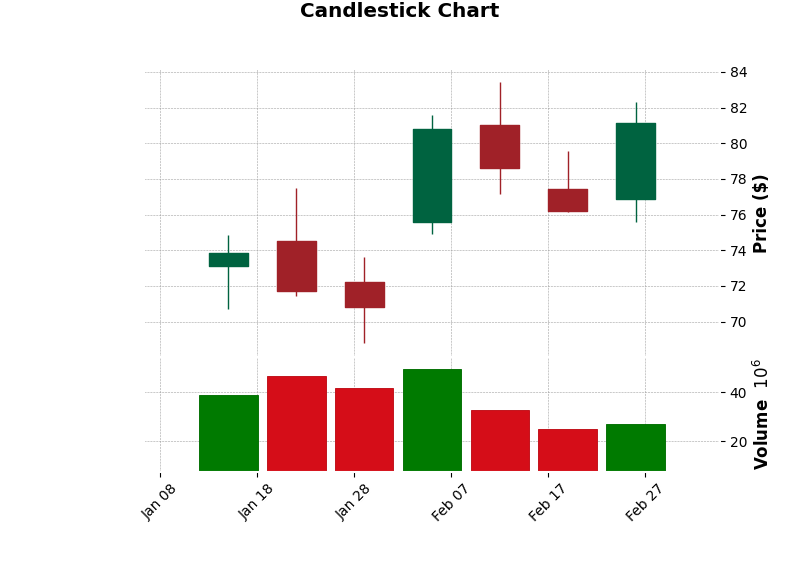
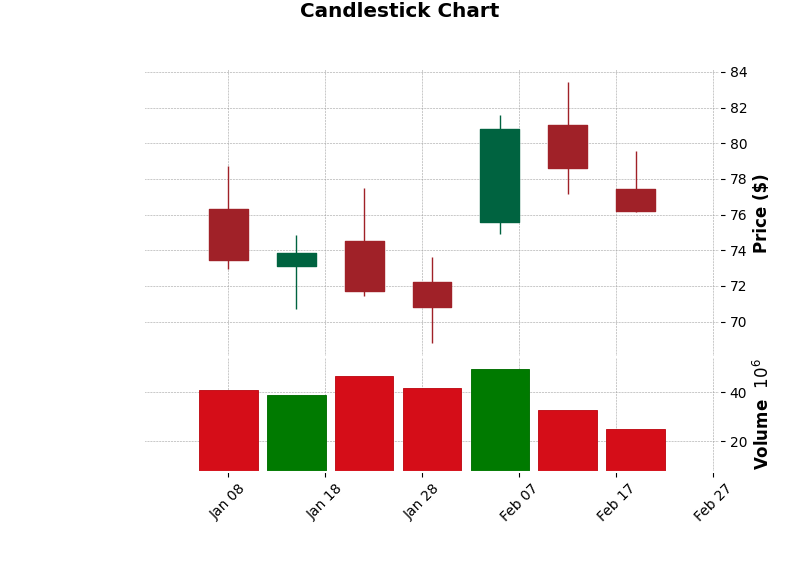
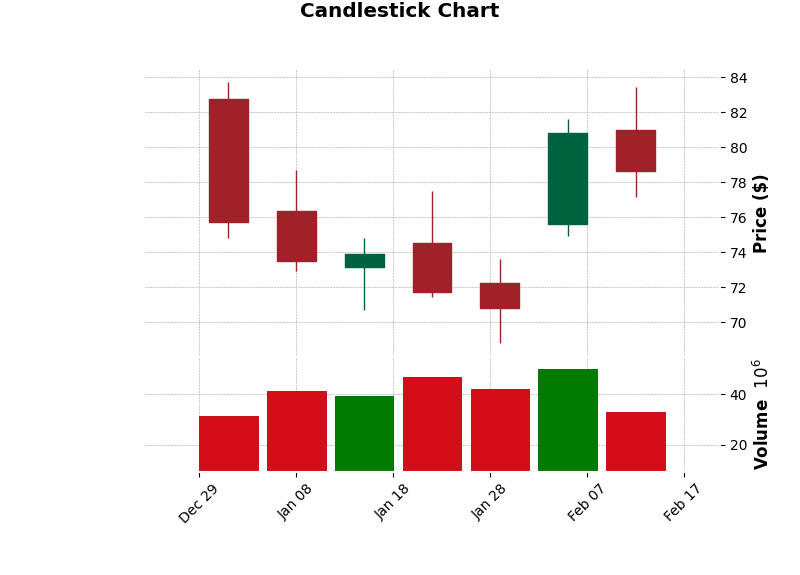
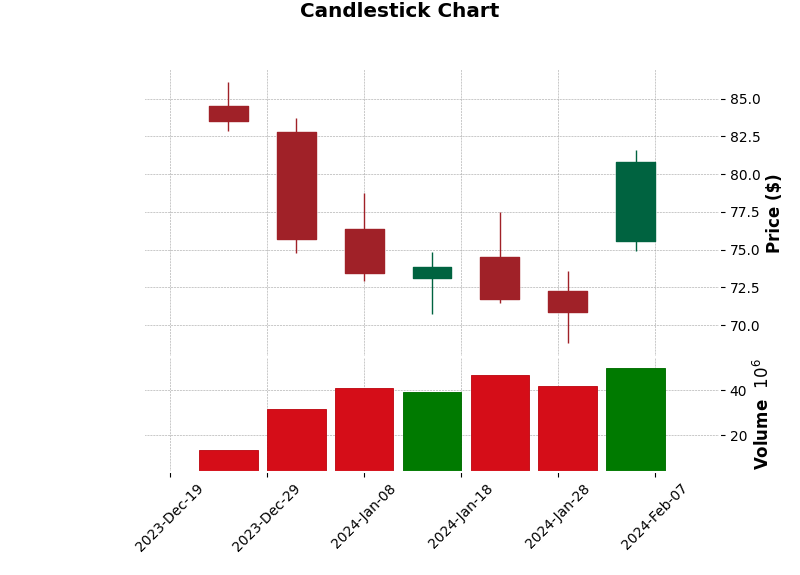
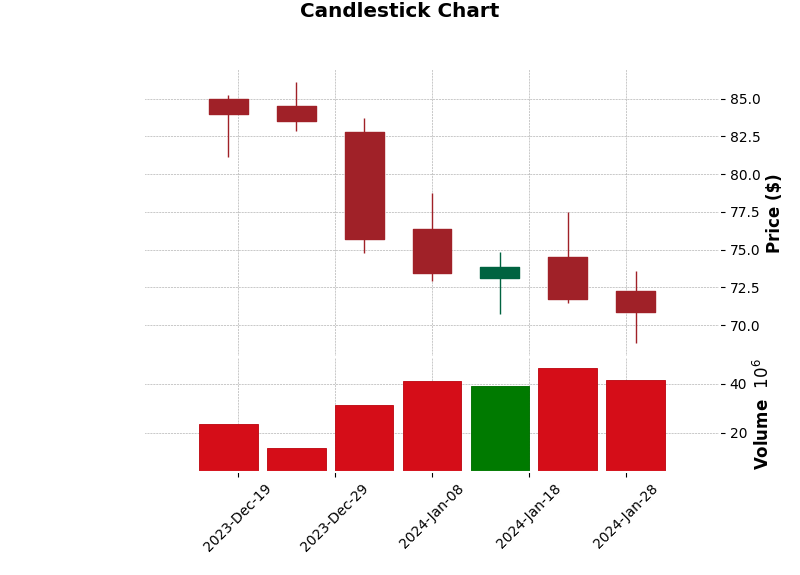
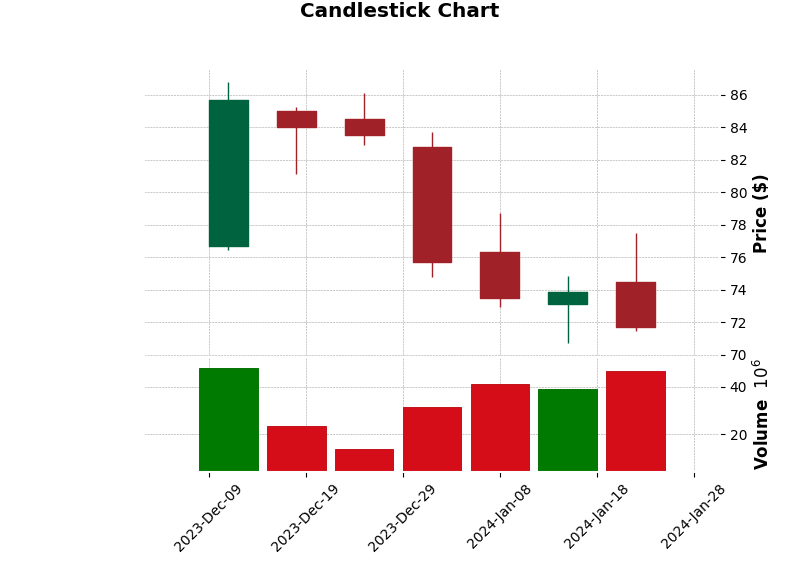
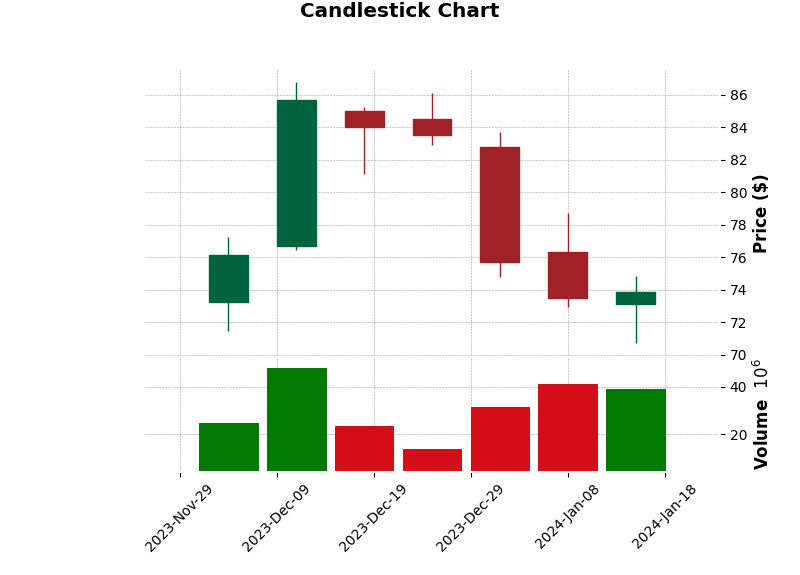
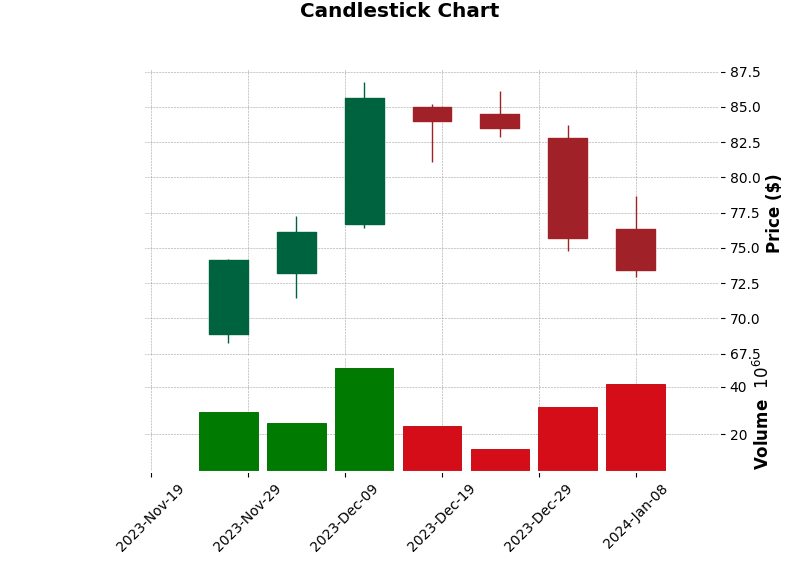
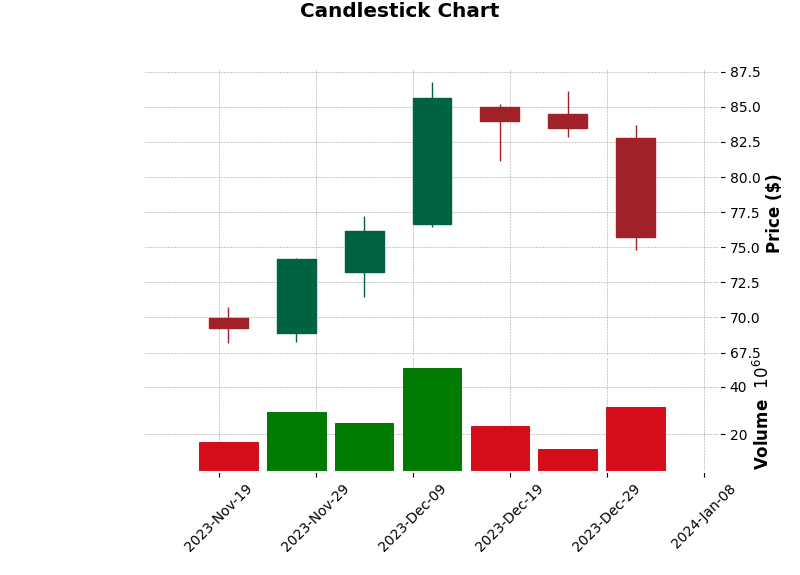
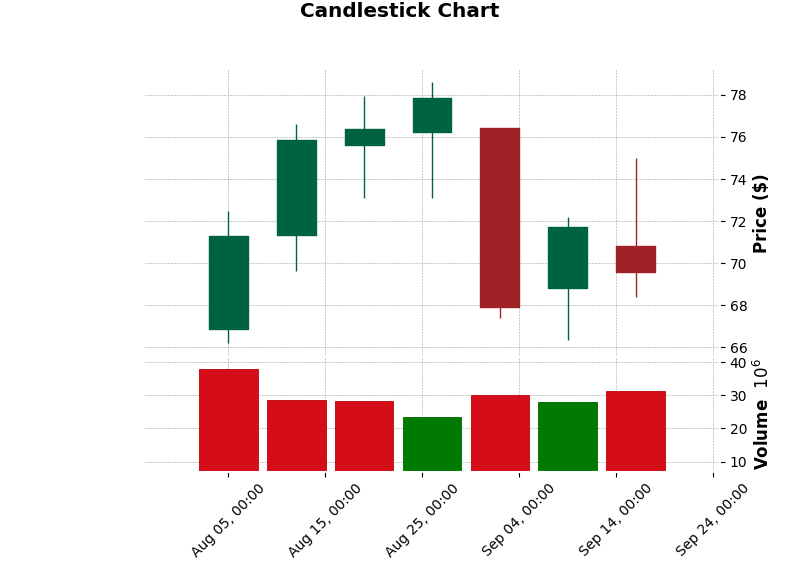

In [37]:
resulting_few_shots = construct_few_shots(few_shot_prompt,images_data_dict, mapping_dict, general_dict)

messages = build_messages(final_chart_dict,final_prediction_prompt, system_prompt, intro_prompt, resulting_few_shots, general_dict)

messages

In [45]:
response = client.chat.completions.create(
    model=MODEL,
    messages=messages,
    temperature=0,
    seed=123456,
)

print(response.choices[0].message.content)


{
    "High":"73.00",
    "Low":"68.50"
}


In [47]:
MODEL=models[0]

Run predictions on test set

In [48]:
import json

def get_prediction(final_image_path:str,few_shot_prompt,images_data_dict, mapping_dict, general_dict, few_shots=True) -> float:
    #load image
    final_chart_dict = load_image_and_convert_to_base64(final_image_path)

    if few_shots:
    # update message
        resulting_few_shots = construct_few_shots(few_shot_prompt,images_data_dict, mapping_dict, general_dict)
    else:
        resulting_few_shots = None
    messages = build_messages(final_chart_dict,final_prediction_prompt, system_prompt, intro_prompt, resulting_few_shots, general_dict)


    # get prediction
    response = client.chat.completions.create(
    model=MODEL,
    messages=messages,
    temperature=0,
    seed=123456)

    # print(response.choices[0].message.content)


    return response.choices[0].message.content

few_shots = True
# single_prediction = json.loads(get_prediction(final_image_path,few_shot_prompt,images_data_dict, mapping_dict, general_dict,few_shots=few_shots))
# single_prediction

In [49]:
import os
import pandas as pd
import json
from helpers_functions import build_dataframe_from_folder


# Specify the folder containing the chart images and labels
folder = 'chart_images/test'  # Replace with your actual folder path

# Build the DataFrame
df = build_dataframe_from_folder(folder)

# Display the DataFrame
df


,image_path,label_data,Open,High,Low
0,chart_images/test\chart_17.png,"[{'Date': '2024-05-27 00:00:00', 'Open': 72.43...",72.430,75.34,70.6100
1,chart_images/test\chart_13.png,"[{'Date': '2024-06-24 00:00:00', 'Open': 68.2,...",68.200,69.38,66.7602
2,chart_images/test\chart_0.png,"[{'Date': '2024-09-23 00:00:00', 'Open': 69.98...",69.980,70.77,69.5000
3,chart_images/test\chart_2.png,"[{'Date': '2024-09-09 00:00:00', 'Open': 68.8,...",68.800,72.17,66.3600
4,chart_images/test\chart_11.png,"[{'Date': '2024-07-08 00:00:00', 'Open': 73.12...",73.120,78.31,72.3700
5,chart_images/test\chart_4.png,"[{'Date': '2024-08-26 00:00:00', 'Open': 76.22...",76.220,78.61,73.0900
6,chart_images/test\chart_6.png,"[{'Date': '2024-08-12 00:00:00', 'Open': 71.32...",71.320,76.62,69.6100
7,chart_images/test\chart_1.png,"[{'Date': '2024-09-16 00:00:00', 'Open': 70.8,...",70.800,74.99,68.3900
8,chart_images/test\chart_10.png,"[{'Date': '2024-07-15 00:00:00', 'Open': 75.76...",75.760,78.76,72.0200
9,chart_images/test\chart_8.png,"[{'Date': '2024-07-29 00:00:00', 'Open': 75.9,...",75.900,80.08,67.1300


In [50]:
df['predictions'] = df['image_path'].apply(lambda x: json.loads(get_prediction(x,few_shot_prompt,images_data_dict, mapping_dict, general_dict,few_shots=few_shots)))

In [52]:
def process_predictions(df):
    """
    Processes the predictions in the DataFrame by unpacking the 'predictions' column,
    creating new columns for predicted values, and calculating deviations.

    Parameters:
        df (pandas.DataFrame): The input DataFrame with columns 'High', 'Low', and 'predictions'.

    Returns:
        pandas.DataFrame: The DataFrame with new columns added.
    """
    import pandas as pd

    # Ensure 'High' and 'Low' columns are numeric
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
    df['Open'] = df['label_data'].apply(lambda x: x[0]['Open'])
    df['Date'] = df['label_data'].apply(lambda x: x[0]['Date'])

    # Unpack 'predictions' column into 'High_predicted' and 'Low_predicted'
    df['High_predicted'] = df['predictions'].apply(lambda x: float(x['High']) if x.get('High') else None)
    df['Low_predicted'] = df['predictions'].apply(lambda x: float(x['Low']) if x.get('Low') else None)

    # Calculate deviations
    df['High_deviation'] = df['High'] - df['High_predicted']
    df['Low_deviation'] = df['Low'] - df['Low_predicted']
    
    # Calculate profit
    df['Profit'] = df.apply(lambda x: x['High_predicted']-x['Open'] if float(x['High_deviation'])>0 else 0,axis=1) 
    # Calculate the number of profitable trades
    profitable_trades = (df['Profit'] > 0).sum()

    # Calculate the total number of trades
    total_trades = len(df)

    # Calculate the profit ratio
    df['Profit_ratio'] = profitable_trades / total_trades if total_trades > 0 else 0
    
    df['Raw_profit'] =  df['Profit'] * 100
    df['TTL_profit'] = df['Raw_profit'].sum()

    # Reorder columns
    desired_order = [
        'image_path',
        'label_data',
        'predictions',
        'Date',
        'Open',
        'High',
        'High_predicted',
        'High_deviation',
        'Low',
        'Low_predicted',
        'Low_deviation',
        'Profit',
        'Profit_ratio',
        'Raw_profit',
        'TTL_profit'
    ]
    # Ensure all desired columns exist in the DataFrame
    existing_columns = [col for col in desired_order if col in df.columns]
    df = df[existing_columns]
    return df.sort_values(by='Date',ascending=False)

df_ = process_predictions(df)
df_

,image_path,label_data,predictions,Date,Open,High,High_predicted,High_deviation,Low,Low_predicted,Low_deviation,Profit,Profit_ratio,Raw_profit,TTL_profit
2,chart_images/test\chart_0.png,"[{'Date': '2024-09-23 00:00:00', 'Open': 69.98...","{'High': '75.50', 'Low': '69.00'}",2024-09-23 00:00:00,69.980,70.77,75.5,-4.73,69.5000,69.0,0.5000,0.000,0.45,0.0,2377.1
7,chart_images/test\chart_1.png,"[{'Date': '2024-09-16 00:00:00', 'Open': 70.8,...","{'High': '76.00', 'Low': '70.00'}",2024-09-16 00:00:00,70.800,74.99,76.0,-1.01,68.3900,70.0,-1.6100,0.000,0.45,0.0,2377.1
3,chart_images/test\chart_2.png,"[{'Date': '2024-09-09 00:00:00', 'Open': 68.8,...","{'High': '78.50', 'Low': '72.00'}",2024-09-09 00:00:00,68.800,72.17,78.5,-6.33,66.3600,72.0,-5.6400,0.000,0.45,0.0,2377.1
10,chart_images/test\chart_3.png,"[{'Date': '2024-09-02 00:00:00', 'Open': 76.41...","{'High': '78.50', 'Low': '73.00'}",2024-09-02 00:00:00,76.410,76.41,78.5,-2.09,67.4100,73.0,-5.5900,0.000,0.45,0.0,2377.1
5,chart_images/test\chart_4.png,"[{'Date': '2024-08-26 00:00:00', 'Open': 76.22...","{'High': '78.50', 'Low': '72.00'}",2024-08-26 00:00:00,76.220,78.61,78.5,0.11,73.0900,72.0,1.0900,2.280,0.45,228.0,2377.1
17,chart_images/test\chart_5.png,"[{'Date': '2024-08-19 00:00:00', 'Open': 75.64...","{'High': '78.50', 'Low': '72.00'}",2024-08-19 00:00:00,75.640,77.94,78.5,-0.56,73.1050,72.0,1.1050,0.000,0.45,0.0,2377.1
6,chart_images/test\chart_6.png,"[{'Date': '2024-08-12 00:00:00', 'Open': 71.32...","{'High': '75.00', 'Low': '68.50'}",2024-08-12 00:00:00,71.320,76.62,75.0,1.62,69.6100,68.5,1.1100,3.680,0.45,368.0,2377.1
16,chart_images/test\chart_7.png,"[{'Date': '2024-08-05 00:00:00', 'Open': 66.85...","{'High': '78.00', 'Low': '70.00'}",2024-08-05 00:00:00,66.850,72.48,78.0,-5.52,66.1800,70.0,-3.8200,0.000,0.45,0.0,2377.1
9,chart_images/test\chart_8.png,"[{'Date': '2024-07-29 00:00:00', 'Open': 75.9,...","{'High': '78.00', 'Low': '72.00'}",2024-07-29 00:00:00,75.900,80.08,78.0,2.08,67.1300,72.0,-4.8700,2.100,0.45,210.0,2377.1
18,chart_images/test\chart_9.png,"[{'Date': '2024-07-22 00:00:00', 'Open': 75.34...","{'High': '78.00', 'Low': '72.00'}",2024-07-22 00:00:00,75.340,77.56,78.0,-0.44,66.7800,72.0,-5.2200,0.000,0.45,0.0,2377.1


In [53]:
df_gpt4o

,image_path,label_data,predictions,Date,Open,High,High_predicted,High_deviation,Low,Low_predicted,Low_deviation,Profit,Profit_ratio,Raw_profit,TTL_profit
2,chart_images/test\chart_0.png,"[{'Date': '2024-09-23 00:00:00', 'Open': 69.98...","{'High': '73.50', 'Low': '68.50'}",2024-09-23 00:00:00,69.980,70.77,73.5,-2.73,69.5000,68.5,1.0000,0.000,0.65,0.0,2598.1
7,chart_images/test\chart_1.png,"[{'Date': '2024-09-16 00:00:00', 'Open': 70.8,...","{'High': '74.50', 'Low': '68.00'}",2024-09-16 00:00:00,70.800,74.99,74.5,0.49,68.3900,68.0,0.3900,3.700,0.65,370.0,2598.1
3,chart_images/test\chart_2.png,"[{'Date': '2024-09-09 00:00:00', 'Open': 68.8,...","{'High': '78.00', 'Low': '72.50'}",2024-09-09 00:00:00,68.800,72.17,78.0,-5.83,66.3600,72.5,-6.1400,0.000,0.65,0.0,2598.1
10,chart_images/test\chart_3.png,"[{'Date': '2024-09-02 00:00:00', 'Open': 76.41...","{'High': '79.50', 'Low': '74.50'}",2024-09-02 00:00:00,76.410,76.41,79.5,-3.09,67.4100,74.5,-7.0900,0.000,0.65,0.0,2598.1
5,chart_images/test\chart_4.png,"[{'Date': '2024-08-26 00:00:00', 'Open': 76.22...","{'High': '78.00', 'Low': '73.50'}",2024-08-26 00:00:00,76.220,78.61,78.0,0.61,73.0900,73.5,-0.4100,1.780,0.65,178.0,2598.1
17,chart_images/test\chart_5.png,"[{'Date': '2024-08-19 00:00:00', 'Open': 75.64...","{'High': '77.00', 'Low': '71.50'}",2024-08-19 00:00:00,75.640,77.94,77.0,0.94,73.1050,71.5,1.6050,1.360,0.65,136.0,2598.1
6,chart_images/test\chart_6.png,"[{'Date': '2024-08-12 00:00:00', 'Open': 71.32...","{'High': '74.00', 'Low': '68.00'}",2024-08-12 00:00:00,71.320,76.62,74.0,2.62,69.6100,68.0,1.6100,2.680,0.65,268.0,2598.1
16,chart_images/test\chart_7.png,"[{'Date': '2024-08-05 00:00:00', 'Open': 66.85...","{'High': '76.50', 'Low': '70.00'}",2024-08-05 00:00:00,66.850,72.48,76.5,-4.02,66.1800,70.0,-3.8200,0.000,0.65,0.0,2598.1
9,chart_images/test\chart_8.png,"[{'Date': '2024-07-29 00:00:00', 'Open': 75.9,...","{'High': '76.50', 'Low': '70.50'}",2024-07-29 00:00:00,75.900,80.08,76.5,3.58,67.1300,70.5,-3.3700,0.600,0.65,60.0,2598.1
18,chart_images/test\chart_9.png,"[{'Date': '2024-07-22 00:00:00', 'Open': 75.34...","{'High': '77.50', 'Low': '72.50'}",2024-07-22 00:00:00,75.340,77.56,77.5,0.06,66.7800,72.5,-5.7200,2.160,0.65,216.0,2598.1


In [54]:
df_.to_excel("onsemi_gpt4omini.xlsx")